In [1]:
#importing necessesity libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#initialing the dataframe and seeing the dataset
df=pd.read_csv('train.csv')
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   127         120       RL          NaN     4928   Pave   NaN      IR1   
1   889          20       RL         95.0    15865   Pave   NaN      IR1   
2   793          60       RL         92.0     9920   Pave   NaN      IR1   
3   110          20       RL        105.0    11751   Pave   NaN      IR1   
4   422          20       RL          NaN    16635   Pave   NaN      IR1   
5  1197          60       RL         58.0    14054   Pave   NaN      IR1   
6   561          20       RL          NaN    11341   Pave   NaN      IR1   
7  1041          20       RL         88.0    13125   Pave   NaN      Reg   
8   503          20       RL         70.0     9170   Pave   NaN      Reg   
9   576          50       RL         80.0     8480   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
8         Lvl    AllPub  ...        0    NaN  GdPrv        Shed     400   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  
5     11   2006       New        Partial     219210  
6      5   2010        WD         Normal     121500  
7      1   2006        WD         Normal     155000  
8      4   2007        WD         Normal     140000  
9     10   2008       COD        Abnorml     118500  

[10 rows x 81 columns]

In [3]:
#check the count of missing value and getting summary.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

.There are total 81 column and 1168 rows.                     
.Null value are present in some of the column .so, first remove them before moving forward.            
.We can also drop the column 'Id' as it is not beneficial for the creating the model.   
.We can observe that .we, have lots of column having diffrent-diffrent datatype i.e some of them of 'int64', some of them are of 'float64', where are rest are of 'object' datatype. As, we know that model only accept numeric /continous datatype  .so, we have to first convert the object datatype into int /float datatype. so,that model can accepct the dataset.       

In [4]:
#Droping waste column
df=df.drop(['Id'],axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0         120       RL          NaN     4928   Pave   NaN      IR1   
1          20       RL         95.0    15865   Pave   NaN      IR1   
2          60       RL         92.0     9920   Pave   NaN      IR1   
3          20       RL        105.0    11751   Pave   NaN      IR1   
4          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2         Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   
3         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2007        WD         Normal     128000  
1       0     10    2007        WD         Normal     268000  
2       0      6    2007        WD         Normal     269790  
3       0      1    2010       COD         Normal     190000  
4       0      6    2009        WD         Normal     215000  

[5 rows x 80 columns]

In [5]:
#We can drop 'PoolQC','MiscFeature' and 'Alley' and 'Fence' as these column has only 7,44, and 77 and 237  non-null value .so, it doesnot effect the model
df=df.drop(['Alley','MiscFeature','PoolQC','Fence'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    954 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [6]:
#First we have to fill null value
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [7]:
#Rechecking the count of null-value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

.Now we can fill the null value . so, we can proceed further. to encode all the column having object datatype using OrdinalEncoder.so, that model can accepct rhe dataset.

In [8]:
#Importing OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [9]:
#Encoding MSZoning
ord_encoder=OrdinalEncoder(categories=[['RL','RM', 'C (all)', 'FV', 'RH']])
df1=ord_encoder.fit_transform(df[['MSZoning']])
df1

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [2.],
       [0.]])

In [10]:
#Encoding Street
ord_encoder=OrdinalEncoder(categories=[['Pave','Grvl']])
df2=ord_encoder.fit_transform(df[['Street']])
df2

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [11]:
#Encoding LotShape
ord_encoder=OrdinalEncoder(categories=[['IR1','Reg', 'IR3', 'IR2']])
df3=ord_encoder.fit_transform(df[['LotShape']])
df3

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]])

In [12]:
#Encoding LandContour
ord_encoder=OrdinalEncoder(categories=[['Lvl','Bnk', 'Low', 'HLS']])
df4=ord_encoder.fit_transform(df[['LandContour']])
df4

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [13]:
#Encoding LotConfig
ord_encoder=OrdinalEncoder(categories=[['Inside','Corner', 'CulDSac', 'FR3', 'FR2']])
df5=ord_encoder.fit_transform(df[['LotConfig']])
df5

array([[0.],
       [0.],
       [2.],
       ...,
       [4.],
       [0.],
       [0.]])

In [14]:
#Encoding LandSlope
ord_encoder=OrdinalEncoder(categories=[['Gtl','Mod', 'Sev']])
df6=ord_encoder.fit_transform(df[['LandSlope']])
df6

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [15]:
#Encoding Neighborhood
ord_encoder=OrdinalEncoder(categories=[['NPkVill','BrkSide', 'Sawyer', 'StoneBr', 'NridgHt', 'Blmngtn', 'Veenker', 'MeadowV', 'BrDale', 'CollgCr', 'Crawfor', 'ClearCr', 'Edwards', 'Timber', 'Blueste', 'SWISU', 'NWAmes', 'OldTown', 'Gilbert', 'SawyerW', 'Somerst', 'NoRidge', 'NAmes', 'IDOTRR', 'Mitchel']])
df7=ord_encoder.fit_transform(df[['Neighborhood']])
df7

array([[ 0.],
       [22.],
       [21.],
       ...,
       [ 0.],
       [23.],
       [18.]])

In [16]:
#Encoding Condition1
ord_encoder=OrdinalEncoder(categories=[['Norm','RRAe', 'RRNn', 'RRAn', 'PosN', 'Feedr', 'PosA', 'RRNe', 'Artery']])
df8=ord_encoder.fit_transform(df[['Condition1']])
df8

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [5.],
       [0.]])

In [17]:
#Encoding Condition2
ord_encoder=OrdinalEncoder(categories=[['Norm','RRAe', 'RRNn', 'RRAn', 'PosN', 'Feedr', 'PosA', 'RRNe', 'Artery']])
df9=ord_encoder.fit_transform(df[['Condition2']])
df9

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [18]:
#Encoding BldgType
ord_encoder=OrdinalEncoder(categories=[['TwnhsE','1Fam', '2fmCon', 'Duplex', 'Twnhs']])
df10=ord_encoder.fit_transform(df[['BldgType']])
df10

array([[0.],
       [1.],
       [1.],
       ...,
       [4.],
       [1.],
       [1.]])

In [19]:
#Encoding HouseStyle
ord_encoder=OrdinalEncoder(categories=[['1Story','2Story', '1.5Fin', '2.5Fin', '2.5Unf', '1.5Unf', 'SFoyer', 'SLvl']])
df11=ord_encoder.fit_transform(df[['HouseStyle']])
df11

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [20]:
#Encoding RoofStyle
ord_encoder=OrdinalEncoder(categories=[['Gable','Shed', 'Gambrel', 'Hip', 'Flat', 'Mansard']])
df12=ord_encoder.fit_transform(df[['RoofStyle']])
df12

array([[0.],
       [4.],
       [0.],
       ...,
       [0.],
       [2.],
       [0.]])

In [21]:
#Encoding RoofMatl
ord_encoder=OrdinalEncoder(categories=[['CompShg','WdShake', 'WdShngl', 'Roll', 'Tar&Grv', 'Membran', 'ClyTile', 'Metal']])
df13=ord_encoder.fit_transform(df[['RoofMatl']])
df13

array([[0.],
       [4.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [22]:
#Encoding Exterior1st
ord_encoder=OrdinalEncoder(categories=[['Plywood','MetalSd', 'HdBoard', 'Stone', 'AsbShng', 'Stucco', 'ImStucc', 'CemntBd', 'BrkComm', 'Wd Sdng', 'WdShing', 'AsphShn', 'VinylSd', 'BrkFace']])
df14=ord_encoder.fit_transform(df[['Exterior1st']])
df14

array([[ 0.],
       [ 9.],
       [ 1.],
       ...,
       [ 0.],
       [13.],
       [12.]])

In [23]:
#Encoding Exterior2nd
ord_encoder=OrdinalEncoder(categories=[['Plywood','MetalSd','CmentBd', 'HdBoard', 'Stone', 'AsbShng', 'Brk Cmn', 'Other', 'Stucco', 'ImStucc', 'Wd Shng', 'Wd Sdng', 'AsphShn', 'VinylSd', 'BrkFace']])
df15=ord_encoder.fit_transform(df[['Exterior2nd']])
df15

array([[ 0.],
       [11.],
       [ 1.],
       ...,
       [ 6.],
       [14.],
       [13.]])

In [24]:
#Encoding RoofMatl
ord_encoder=OrdinalEncoder(categories=[['None','BrkCmn', 'Stone', 'BrkFace']])
df16=ord_encoder.fit_transform(df[['MasVnrType']])
df16

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [25]:
#Encoding ExterQual
ord_encoder=OrdinalEncoder(categories=[['TA','Gd', 'Ex', 'Fa']])
df17=ord_encoder.fit_transform(df[['ExterQual']])
df17

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [26]:
#Encoding ExterCond
ord_encoder=OrdinalEncoder(categories=[['TA','Gd', 'Ex', 'Fa','Po']])
df18=ord_encoder.fit_transform(df[['ExterCond']])
df18

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [3.],
       [0.]])

In [27]:
#Encoding Foundation
ord_encoder=OrdinalEncoder(categories=[['CBlock','Wood', 'Stone', 'PConc', 'BrkTil', 'Slab']])
df19=ord_encoder.fit_transform(df[['Foundation']])
df19

array([[0.],
       [3.],
       [3.],
       ...,
       [0.],
       [4.],
       [3.]])

In [28]:
#Encoding BsmtQual
ord_encoder=OrdinalEncoder(categories=[['TA','Gd', 'Ex', 'Fa','Po']])
df20=ord_encoder.fit_transform(df[['BsmtQual']])
df20

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [29]:
#Encoding BsmtCond
ord_encoder=OrdinalEncoder(categories=[['TA','Gd', 'Ex', 'Fa','Po']])
df21=ord_encoder.fit_transform(df[['BsmtCond']])
df21

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [30]:
#Encoding BsmtExposure
ord_encoder=OrdinalEncoder(categories=[['Gd','No', 'Av', 'Mn']])
df22=ord_encoder.fit_transform(df[['BsmtExposure']])
df22

array([[1.],
       [0.],
       [2.],
       ...,
       [1.],
       [1.],
       [1.]])

In [31]:
#Encoding BsmtFinType1
ord_encoder=OrdinalEncoder(categories=[['Unf','GLQ', 'Rec', 'BLQ', 'LwQ', 'ALQ']])
df23=ord_encoder.fit_transform(df[['BsmtFinType1']])
df23

array([[5.],
       [5.],
       [1.],
       ...,
       [5.],
       [0.],
       [1.]])

In [32]:
#Encoding BsmtFinType2
ord_encoder=OrdinalEncoder(categories=[['Unf','GLQ', 'Rec', 'BLQ', 'LwQ', 'ALQ']])
df24=ord_encoder.fit_transform(df[['BsmtFinType2']])
df24

array([[0.],
       [2.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [33]:
#Encoding HeatingQC
ord_encoder=OrdinalEncoder(categories=[['Ex','Gd', 'TA', 'Po', 'Fa']])
df25=ord_encoder.fit_transform(df[['HeatingQC']])
df25

array([[2.],
       [0.],
       [0.],
       ...,
       [2.],
       [2.],
       [0.]])

In [34]:
#Encoding CentralAir
ord_encoder=OrdinalEncoder(categories=[['Y','N']])
df26=ord_encoder.fit_transform(df[['CentralAir']])
df26

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [35]:
#Encoding HeatingQC
ord_encoder=OrdinalEncoder(categories=[['Ex','Gd', 'TA', 'Fa']])
df27=ord_encoder.fit_transform(df[['KitchenQual']])
df27

array([[2.],
       [1.],
       [2.],
       ...,
       [2.],
       [2.],
       [1.]])

In [36]:
#Encoding FireplaceQu
ord_encoder=OrdinalEncoder(categories=[['TA','Gd', 'Po', 'Ex', 'Fa']])
df28=ord_encoder.fit_transform(df[['FireplaceQu']])
df28

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [37]:
#Encoding GarageType
ord_encoder=OrdinalEncoder(categories=[['Attchd','Detchd', 'CarPort', 'Basment', '2Types', 'BuiltIn']])
df29=ord_encoder.fit_transform(df[['GarageType']])
df29

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [38]:
#Encoding GarageFinish
ord_encoder=OrdinalEncoder(categories=[['Unf','Fin', 'RFn']])
df30=ord_encoder.fit_transform(df[['GarageFinish']])
df30

array([[2.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [39]:
#Encoding PavedDrive
ord_encoder=OrdinalEncoder(categories=[['Y','N', 'P']])
df31=ord_encoder.fit_transform(df[['PavedDrive']])
df31

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [40]:
#Encoding SaleType
ord_encoder=OrdinalEncoder(categories=[['WD','CWD', 'ConLw', 'Con', 'New', 'ConLI', 'COD', 'Oth', 'ConLD']])
df32=ord_encoder.fit_transform(df[['SaleType']])
df32

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [41]:
#Encoding SaleCondition
ord_encoder=OrdinalEncoder(categories=[['Normal','AdjLand', 'Alloca', 'Abnorml', 'Partial', 'Family']])
df33=ord_encoder.fit_transform(df[['SaleCondition']])
df33

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

#We can drop column who have more the 95 % single value some of them are  'Utilities','Heating','Electrical','Functional','GarageQual','GarageCond','GarageYrBlt'.                         

In [42]:
#Droping unwanted column
df=df.drop(['Utilities','Heating','Electrical','Functional','GarageQual','GarageCond','GarageYrBlt'],axis=1)

In [43]:
#OverRiding column
df['MSZoning']=df1
df['Street']=df2
df['LotShape']=df3
df['LandContour']=df4
df['LotConfig']=df5
df['LandSlope']=df6
df['Neighborhood']=df7
df['Condition1']=df8
df['Condition2']=df9
df['BldgType']=df10
df['HouseStyle']=df11
df['RoofStyle']=df12
df['RoofMatl']=df13
df['Exterior1st']=df14
df['Exterior2nd']=df15
df['MasVnrType']=df16
df['ExterQual']=df17
df['ExterCond']=df18
df['Foundation']=df19
df['BsmtQual']=df20
df['BsmtCond']=df21
df['BsmtExposure']=df22
df['BsmtFinType1']=df23
df['BsmtFinType2']=df24
df['HeatingQC']=df25
df['CentralAir']=df26
df['KitchenQual']=df27
df['FireplaceQu']=df28
df['GarageType']=df29
df['GarageFinish']=df30
df['PavedDrive']=df31
df['SaleType']=df32
df['SaleCondition']=df33

In [44]:
#Getting the summary
df.describe()

MSSubClass     MSZoning  LotFrontage        LotArea       Street  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean     56.767979     0.343322    70.988470   10484.749144     0.003425   
std      41.940650     0.820333    22.437056    8957.442311     0.058445   
min      20.000000     0.000000    21.000000    1300.000000     0.000000   
25%      20.000000     0.000000    60.000000    7621.500000     0.000000   
50%      50.000000     0.000000    70.988470    9522.500000     0.000000   
75%      70.000000     0.000000    79.250000   11515.500000     0.000000   
max     190.000000     4.000000   313.000000  164660.000000     1.000000   

          LotShape  LandContour    LotConfig    LandSlope  Neighborhood  ...  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000  ...   
mean      0.726027     0.202055     0.426370     0.064212     13.964041  ...   
std       0.611465     0.654766     0.844189     0.284088      7.104103  ...   
min       0.000000     0.000000     0.000000     0.000000      0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000      9.000000  ...   
50%       1.000000     0.000000     0.000000     0.000000     16.000000  ...   
75%       1.000000     0.000000     1.000000     0.000000     20.000000  ...   
max       3.000000     3.000000     4.000000     2.000000     24.000000  ...   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean       23.015411     3.639555    15.051370     3.448630     47.315068   
std        63.191089    29.088867    55.080816    44.896939    543.264432   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

            MoSold       YrSold     SaleType  SaleCondition      SalePrice  
count  1168.000000  1168.000000  1168.000000    1168.000000    1168.000000  
mean      6.344178  2007.804795     0.666952       0.678938  181477.005993  
std       2.686352     1.329738     1.698188       1.440211   79105.586863  
min       1.000000  2006.000000     0.000000       0.000000   34900.000000  
25%       5.000000  2007.000000     0.000000       0.000000  130375.000000  
50%       6.000000  2008.000000     0.000000       0.000000  163995.000000  
75%       8.000000  2009.000000     0.000000       0.000000  215000.000000  
max      12.000000  2010.000000     8.000000       5.000000  755000.000000  

[8 rows x 69 columns]

.There must be some outliers as difference between the mean and std are very less for some columns.              
.Now we remove the outliers if available using z score.                 

In [45]:
#Removing outliers using z score
#Import stats
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(df))
print (z)

[[1.50830058 0.41869467 0.         ... 0.39291158 0.47161769 0.67631017]
 [0.87704243 0.41869467 1.07063136 ... 0.39291158 0.47161769 1.09423443]
 [0.07709478 0.41869467 0.93686671 ... 0.39291158 0.47161769 1.11687211]
 ...
 [2.46243779 0.41869467 2.09513215 ... 0.39291158 0.47161769 0.41705186]
 [0.31562908 2.02038452 0.93583847 ... 0.39291158 0.47161769 1.78922393]
 [0.07709478 0.41869467 0.         ... 0.39291158 0.47161769 0.02179027]]


In [46]:
print('Row number \n',np.where(z>3)[0])
print('column numbers \n',np.where(z>3)[1])

Row number 
 [   1    1    1 ... 1165 1166 1166]
column numbers 
 [ 8 19 33 ... 12 25 37]


In [47]:
index=(np.where(z>3)[0])

In [48]:
df=df.drop(df.index[index])
df.shape

(447, 69)

.Earlier dataset has 1168 rows but now it has only 447 rows . Hence, we removed the outliers  and ready for the use.  

In [49]:
#Checking correlation between the features
corr=df.corr()
corr.shape

(69, 69)

In [50]:
#plotting the heat map of coorelation between features
plt.figure(figsize=(14,12))
sns.heatmap(corr,cbar=True,fmt='.2f',annot=True,square=True,annot_kws={'size':.10},linecolor="white")
plt.show()

.Here, we saw a relation between many column . Some of them are LotFrontage and MSSubClass .so we check for scatter plot. 

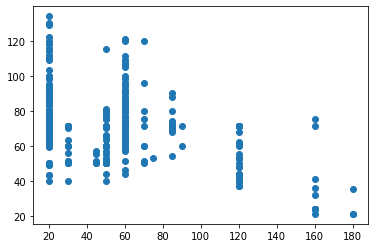

In [51]:
plt.scatter(df.MSSubClass,df.LotFrontage)
plt.show()

.It is not confirmed with the plot. so, are not deleting any features.                

In [52]:
#dividing feature and label data
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

In [53]:
#Data scaling
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [55]:
#train test split
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=300)

In [57]:
#AdaBoost Model Trainning
from sklearn.ensemble import AdaBoostRegressor

In [58]:
ada=AdaBoostRegressor()

In [59]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [60]:
#Model prediction on train data
y_pred=ada.predict(x_train)

In [61]:
print('R square score',metrics.r2_score(y_train,y_pred))

R square score 0.9108766622898463


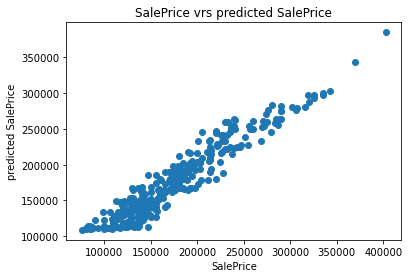

In [62]:
plt.scatter(y_train,y_pred)
plt.xlabel("SalePrice")
plt.ylabel("predicted SalePrice")
plt.title("SalePrice vrs predicted SalePrice")
plt.show()

.We were getting linear relation between SalePrice  and predicted SalePrice . so,we can say that we have close relation between them.so, good to move forward. 

In [63]:
#predicting test data with the model
y_test_pred=ada.predict(x_test)

In [64]:
#Model Evaluation
accuracy=metrics.r2_score(y_test,y_test_pred)
print('R square score:',accuracy)

R square score: 0.8815831225005974


.Model fit 86% of dataset.    

In [65]:
#HyperParameterTunning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [66]:
dt=DecisionTreeRegressor()

In [67]:
params={'n_estimators':[40,47,49,50],
       'learning_rate':[0.30,0.40,0.45]}

In [68]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [69]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [70]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=40)

In [71]:
ada=AdaBoostRegressor(base_estimator=dt,learning_rate=0.4,n_estimators=49)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
print("***accuracy post tunning**")
print(metrics.r2_score(y_test,y_pred))

***accuracy post tunning**
0.9104991724542904


.Before hyperparameter ,model fits 86 % data whereas after parameter,model fits 90 % of the data.        

In [72]:
#Feature Selection using SelectPercentileFeature
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [73]:
#Instantiate SelectPercentile 
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

SPercentile=SelectPercentile(score_func=chi2,percentile=80)

SPercentile=SPercentile.fit(x,y)

In [74]:
#Seperate the features to check P_Values
cols=SPercentile.get_support(indices=True)
features=x.columns[cols]

In [75]:
df_scores=pd.DataFrame({'features':x.columns,
                       'chi2score':SPercentile.scores_})

df_scores.sort_values(by='chi2score',ascending=False)

features      chi2score
3        LotArea  369364.003816
63       MiscVal  227066.326781
39      2ndFlrSF  178857.390982
31    BsmtFinSF1  124616.076635
34     BsmtUnfSF  104641.119803
..           ...            ...
19      RoofMatl            NaN
37    CentralAir            NaN
40  LowQualFinSF            NaN
43  BsmtHalfBath            NaN
62      PoolArea            NaN

[68 rows x 2 columns]

In [76]:
#Let's Print the top 80% features
print(cols)
print(features)

[ 0  1  2  3  5  6  7  9 10 13 14 16 18 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 38 39 41 42 44 45 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 63 64 66 67]
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition'],
      d

In [77]:
#create subset of Selected features
x=df[features]
y=df.SalePrice

In [78]:
#DataScaling
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)


#Spliting dataset into train and test 
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=322)

In [79]:
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.4,
                  n_estimators=49)

In [80]:
#Model prediction on train data
y_pred=ada.predict(x_train)

In [81]:
#predicting test data with the model
y_test_pred=ada.predict(x_test)

In [82]:
#Model Evaluation
accuracy=metrics.r2_score(y_test,y_test_pred)
print('R square score:',accuracy)

R square score: 0.8720596045220446


.We can not increase the accuracy after feature selection method.              

In [98]:
#Saving the model
import pickle
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(ada,f)